In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
import sys
sys.path.append("..")
from wishart import wishart_lib, wishart_lib_stepan
from motifs import motifs

from indexes import indexes_lib
from generator import generator_lib
import numpy as np
from matplotlib import pyplot as plt
import importlib

import sys
sys.path.append("..")
importlib.reload(wishart_lib_stepan)
importlib.reload(wishart_lib)
importlib.reload(indexes_lib)
importlib.reload(generator_lib)
importlib.reload(motifs)

<module 'motifs.motifs' from '/home/mrplotva/time_series/iris/../motifs/motifs.py'>

In [4]:
iris = pd.read_csv("IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [5]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
from random import shuffle
# shuffle(iris)
data = []
for i in range(len(iris)):
    cur = []
    for j in [iris.columns[2], iris.columns[3], iris.columns[-1]]:
        # if j != 'species':
        cur += [iris[j][i]]
    data += [cur]

print(data)
# , iris[i]['sepal_width'], iris[i]['petal_length'], iris[i]['petal_width']]

[[1.4, 0.2, 'Iris-setosa'], [1.4, 0.2, 'Iris-setosa'], [1.3, 0.2, 'Iris-setosa'], [1.5, 0.2, 'Iris-setosa'], [1.4, 0.2, 'Iris-setosa'], [1.7, 0.4, 'Iris-setosa'], [1.4, 0.3, 'Iris-setosa'], [1.5, 0.2, 'Iris-setosa'], [1.4, 0.2, 'Iris-setosa'], [1.5, 0.1, 'Iris-setosa'], [1.5, 0.2, 'Iris-setosa'], [1.6, 0.2, 'Iris-setosa'], [1.4, 0.1, 'Iris-setosa'], [1.1, 0.1, 'Iris-setosa'], [1.2, 0.2, 'Iris-setosa'], [1.5, 0.4, 'Iris-setosa'], [1.3, 0.4, 'Iris-setosa'], [1.4, 0.3, 'Iris-setosa'], [1.7, 0.3, 'Iris-setosa'], [1.5, 0.3, 'Iris-setosa'], [1.7, 0.2, 'Iris-setosa'], [1.5, 0.4, 'Iris-setosa'], [1.0, 0.2, 'Iris-setosa'], [1.7, 0.5, 'Iris-setosa'], [1.9, 0.2, 'Iris-setosa'], [1.6, 0.2, 'Iris-setosa'], [1.6, 0.4, 'Iris-setosa'], [1.5, 0.2, 'Iris-setosa'], [1.4, 0.2, 'Iris-setosa'], [1.6, 0.2, 'Iris-setosa'], [1.6, 0.2, 'Iris-setosa'], [1.5, 0.4, 'Iris-setosa'], [1.5, 0.1, 'Iris-setosa'], [1.4, 0.2, 'Iris-setosa'], [1.5, 0.1, 'Iris-setosa'], [1.2, 0.2, 'Iris-setosa'], [1.3, 0.2, 'Iris-setosa'], 

In [11]:
wishart = wishart_lib.Wishart(10, 0.2)
from random import shuffle
shuffle(data)

print(wishart.fit(wishart.normalize(np.array(data[:, 0, 1]))))


AttributeError: 'list' object has no attribute 'columns'

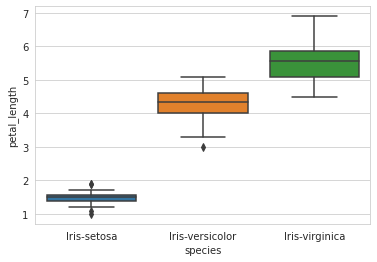

In [ ]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

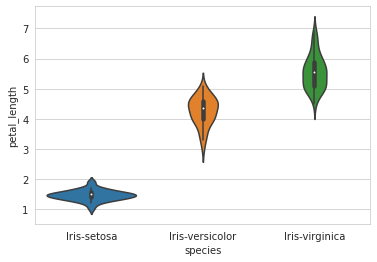

In [ ]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

/home/mrplotva/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


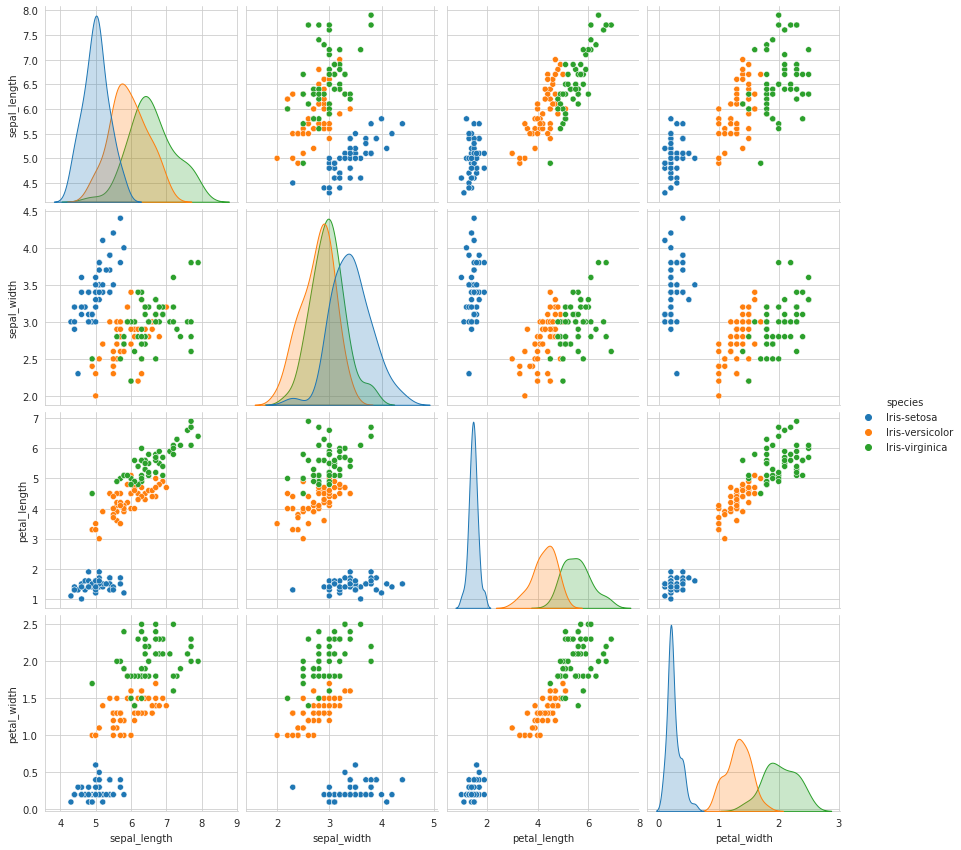

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

In [ ]:
import indexes.indexes_lib 
# tester = indexes_lib.Tester()

In [ ]:

def draw(arr, r, u):
    xs = arr[:, 0]
    ys = arr[:, 1]
    plt.figure(figsize=(18, 12))
    plt.scatter(xs, ys)
    plt.show()
    xs = (xs - min(xs)) / max(xs)
    ys = (ys - min(ys)) / max(ys)
    for i in range(len(arr)):
        arr[i][0] = xs[i]
        arr[i][1] = ys[i]
    w = wishart_lib.Wishart(r, u).fit(arr)
    # print(w)
    tester.add_test(arr, w)
    colour_pool = ['red', 'blue', 'green', 'yellow', 'brown', 'purple', 'orange', 'pink', 'white', 'black', 'cyan']

    clean_data, clean_w = indexes_lib.cleaning(arr, w)
    colours = [colour_pool[i] for i in clean_w]

    plt.figure(figsize=(18, 12))
    plt.scatter(clean_data[:, 0], clean_data[:, 1], c=colours, s=50, label=f'final noise_points: {w.tolist().count(0)}')
    plt.legend(loc='best')
    plt.show()

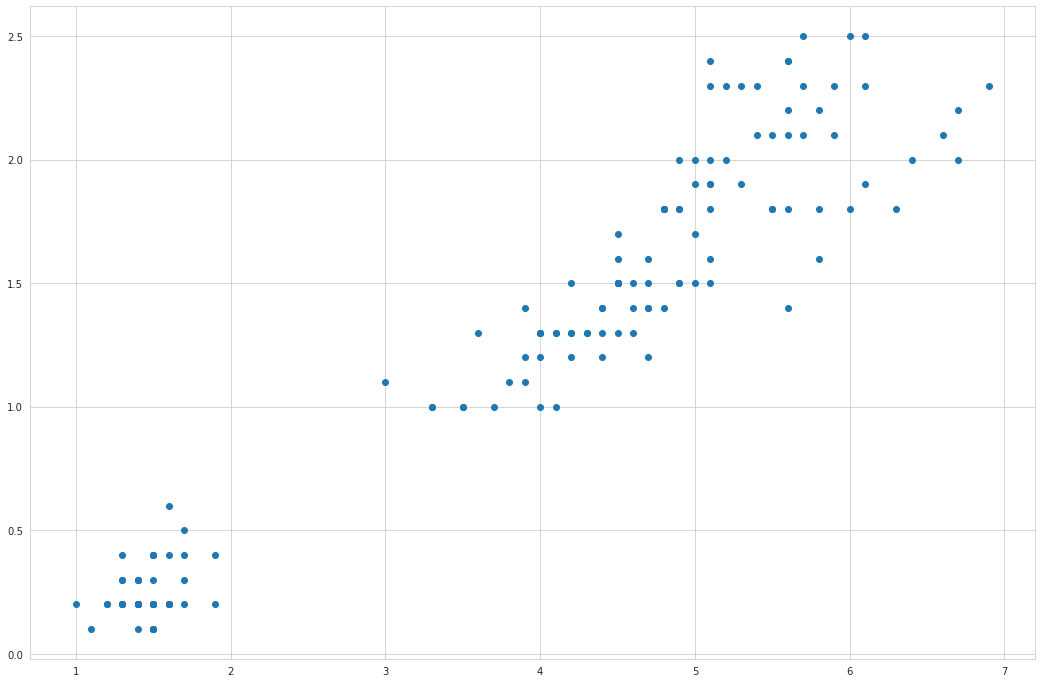

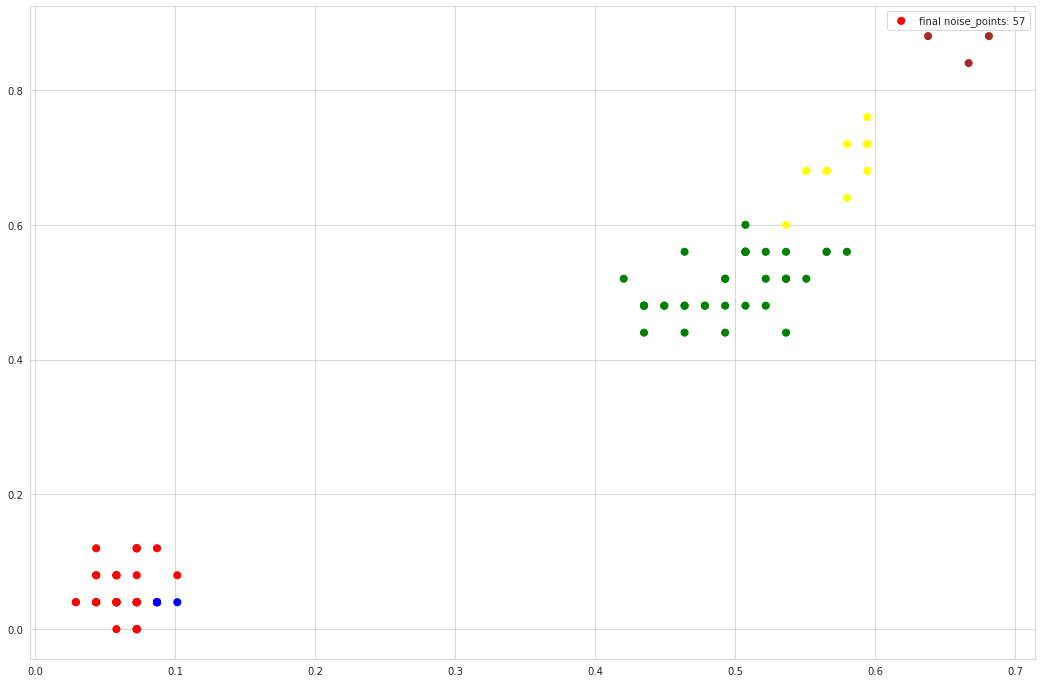

  id       CH      D      S     DB     XB
----  -------  -----  -----  -----  -----
   1  1277.71  0.077  0.568  0.728  2.274


In [ ]:
draw(np.array(data), 10, 0.2)
# tester.display()

In [ ]:
# tester = indexes_lib.Tester()
# tester.add_test(wishart, w)